### Author's Information
1. Name: Kamalini Pradhan
2. Date: 07/19/2024
3. Purpose: Use scikit-learn to build different regression models

## Lab 4 – Regression Analysis
Here is what I will do:
1. Prepare the data
2. Train and analyze a linear regression
- single input feature
- multiple input features
3. Train and analyze a polynomial regression
4. Train and analyze a regularized model


### Prepare the data

In [6]:
import pandas as pd
# Load the CSV file
file_name = 'Howell.csv'
howell_full_df = pd.read_csv(file_name, sep=";")

#### A Better Plot

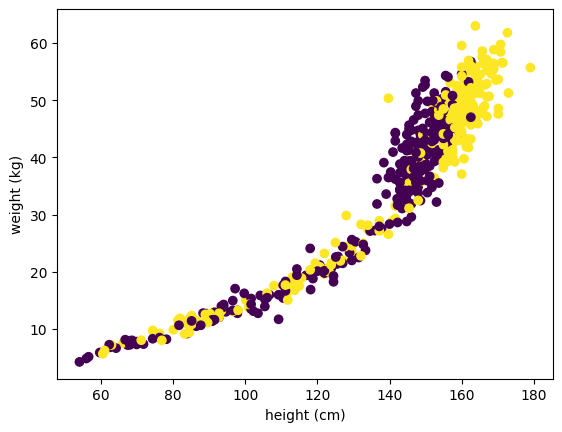

In [5]:
import matplotlib.pyplot as plt
height = howell_full_df['height']
weight = howell_full_df['weight']
# Gender wise plotting
gender = howell_full_df['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

### Adding a New Feature

In [10]:
# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)
#print(bmi(150, 40))
new_feature = bmi(howell_full_df['height'], howell_full_df['weight'])
#print(new_feature)
howell_full_df['bmi'] = new_feature
howell_full_df.head(n=10)

,height,weight,age,male,bmi
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041914,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
5,163.830,62.992589,35.0,1,23.469433
6,149.225,38.243476,32.0,0,17.174108
7,168.910,55.479971,27.0,1,19.445786
8,147.955,34.869885,19.0,0,15.929099
9,165.100,54.487739,54.0,1,19.989625


### Creating a categorical feature
When doing a stratefied sampling, we need a feature that is categorical.  In other words, a feature that has a limited number of values. BMI is continuous.  We probably do not have very many instances that share the same BMI.  BMI already has some arbitraily determined categories:
    - Underweight less than 18.5
    - Normal range of 18.5 to 25.0
    - Overwieght range of 25.0 to 30.0
    - Obese greater than 30
    
Unlike the BMI function, IF does not get applied across an array, so we need to create a version of the function that will.

In [11]:
import numpy as np
def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full_df['bmi class'] = vector_bmi_category(howell_full_df['bmi'])
#print(howell_full_df.head(n=10))
howell_full_df['bmi class'].value_counts()

bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

### Stratified Test/Train Data Split

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
 random_state=123)
for train_indices, test_indices in splitter.split(howell_full_df,
howell_full_df['male']):
 train_set = howell_full_df.iloc[train_indices]
 test_set = howell_full_df.iloc[test_indices]

print('Train size: ', len(train_set), 'Test size: ', len(test_set))
#print('Adult counts', howell_adults['male'].value_counts())
#print('Train counts', train_set['male'].value_counts())
#print('Test counts', test_set['male'].value_counts())


Train size:  435 Test size:  109


### Train and evaluate a Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = train_set[['height']]
y = train_set['weight']
X_test = test_set[['height']]
y_test = test_set['weight']
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression()

#### Prediction for training set

In [16]:
y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -33.41984191195078
 Coefficients [0.49895019]
 Score 0.888561520346697
MAE is  4.05014527622378
RMSE is  5.022216165698149
MSE is  25.222655214999815
R^2  0.888561520346697


#### Prediction for testing set

In [17]:
y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for linear regression on test data
MAE is  4.02780503886074
RMSE is  4.8311512948155855
MSE is  23.340022833398308
R^2  0.8584049348215885


#### Results
Basic results for our regression models to predict weight on
the Howell data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Height|Training|5.02|0.89|
|Linear Regression|Height|Testing|4.83|0.86|

### Plot linear regression model using height to predict weight 

c:\MS\data_analytics\github\44670_MachineLearning\AMLLab4\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


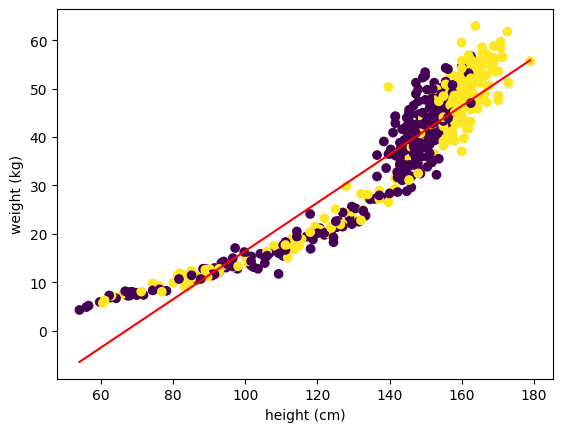

In [20]:
import matplotlib.pyplot as plt
height = howell_full_df['height']
weight = howell_full_df['weight']
# Gender wise plotting
gender = howell_full_df['male']
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)
plt.plot(x_values, y_values, c='red')
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

### Add a feature to the model

In [23]:
X = train_set[['height', 'age']]
y = train_set['weight']
X_test = test_set[['height', 'age']]
y_test = test_set['weight']
print('Results for linear regression on training data')
print('Input: Height, age')
print('Results for linear regression on test data')
print('Input: Height, age')
lr_model = LinearRegression()
lr_model.fit(X,y)

Results for linear regression on training data
Input: Height, age
Results for linear regression on test data
Input: Height, age


LinearRegression()

#### Prediction for training set

In [24]:
y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -31.662990701523782
 Coefficients [0.47722377 0.04279565]
 Score 0.8903969090930187
MAE is  4.039879412380843
RMSE is  4.980686575733395
MSE is  24.807238765690848
R^2  0.8903969090930187


#### Prediction for testing set

In [25]:
y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for linear regression on test data
MAE is  3.972089990655784
RMSE is  4.744425785229733
MSE is  22.509576031552776
R^2  0.8634429405627938


#### Results
Basic results for our regression models to predict weight on
the Howell data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Height|Training|4.98|0.89|
|Linear Regression|Height|Testing|4.74|0.86|

### Polynomial Regression for power=3

In [34]:
from sklearn.preprocessing import PolynomialFeatures
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)
X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)
lr_model = LinearRegression()
lr_model.fit(X_poly,y)

LinearRegression()

#### Prediction for training set

In [35]:
y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

Results for linear regression on training data
Polynomial regression with degree  3
 Default settings
Internal parameters:
 Bias is  36.34428565946676
 Coefficients [-9.08521465e-01  7.88566772e-03 -1.08789057e-05]
 Score 0.9322474878305416
MAE is  2.9836921409520585
RMSE is  3.9159804400194407
MSE is  15.334902806614851
R^2  0.9322474878305416


#### Prediction for testing set

In [39]:
y_pred_test = lr_model.predict(X_poly_test)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly_test,y_test))
print('MAE is ', mean_absolute_error(y_test, y_pred_test))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MSE is ', mean_squared_error(y_test, y_pred_test))
print('R^2 ', r2_score(y_test,y_pred_test))

Results for linear regression on training data
Polynomial regression with degree  3
 Default settings
Internal parameters:
 Bias is  36.34428565946676
 Coefficients [-9.08521465e-01  7.88566772e-03 -1.08789057e-05]
 Score 0.9057114462631268
MAE is  3.0125903879834017
RMSE is  3.9423580649221366
MSE is  15.542187112056613
R^2  0.9057114462631268


#### Results
Basic results for our regression models to predict weight on
the Howell data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Height|Training|3.92|0.93|
|Linear Regression|Height|Testing|3.94|0.91|

#### Polynomial Regress Graph

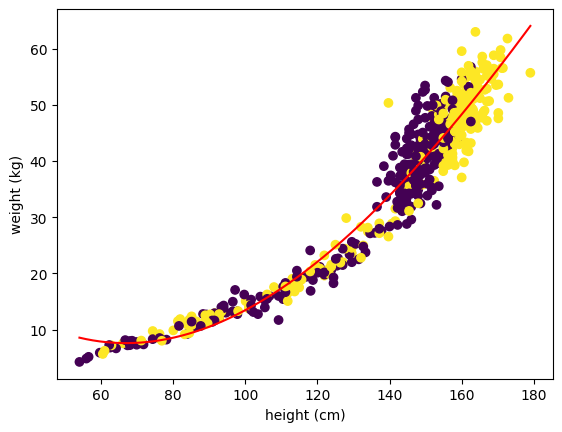

In [40]:
import matplotlib.pyplot as plt
height = howell_full_df['height']
weight = howell_full_df['weight']
# Gender wise plotting
gender = howell_full_df['male']
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)
plt.plot(x_values, y_values, c='red')
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

### Polynomial Regression for power=8

In [41]:
from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)
X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)
lr_model = LinearRegression()
lr_model.fit(X_poly,y)

LinearRegression()

#### Prediction for training set

In [42]:
y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  12.972190414915495
 Coefficients [-4.87856869e-07 -2.87216867e-05 -7.94873980e-04  3.10774425e-05
 -4.83348306e-07  3.72150586e-09 -1.40903732e-11  2.09435600e-14]
 Score 0.9374893737697513
MAE is  2.7403912537472754
RMSE is  3.761445184830995
MSE is  14.14846987848828
R^2  0.9374893737697513


#### Prediction for testing set

In [43]:
y_pred_test = lr_model.predict(X_poly_test)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly_test,y_test))
print('MAE is ', mean_absolute_error(y_test, y_pred_test))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MSE is ', mean_squared_error(y_test, y_pred_test))
print('R^2 ', r2_score(y_test,y_pred_test))

Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  12.972190414915495
 Coefficients [-4.87856869e-07 -2.87216867e-05 -7.94873980e-04  3.10774425e-05
 -4.83348306e-07  3.72150586e-09 -1.40903732e-11  2.09435600e-14]
 Score 0.9121282639156724
MAE is  2.8422135186830104
RMSE is  3.805845753401635
MSE is  14.48446189868526
R^2  0.9121282639156724


#### Results
Basic results for our regression models to predict weight on
the Howell data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Height|Training|3.76|0.94|
|Linear Regression|Height|Testing|3.81|0.91|

#### Polynomial Regress Graph

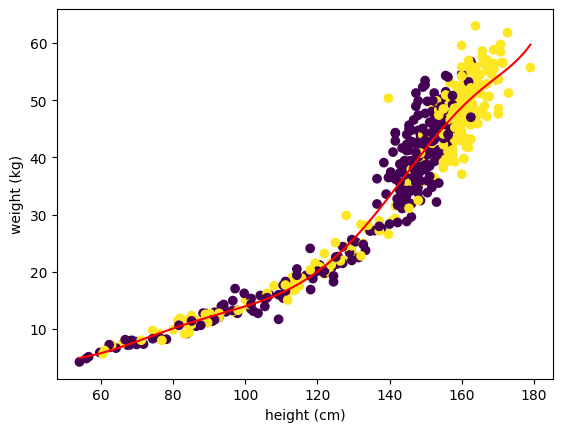

In [44]:
import matplotlib.pyplot as plt
height = howell_full_df['height']
weight = howell_full_df['weight']
# Gender wise plotting
gender = howell_full_df['male']
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)
plt.plot(x_values, y_values, c='red')
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

### Elastic Net with Poly Features

In [45]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)
X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)
lr_model = reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
lr_model.fit(X_poly,y)

c:\MS\data_analytics\github\44670_MachineLearning\AMLLab4\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.233e+03, tolerance: 9.846e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.3)

#### Prediction for training set

In [46]:
y_pred = reg_lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)
print(' Score', reg_lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  17.29892662939519
 Coefficients [-2.22044117e-01  5.22052404e-04  8.14877047e-06  3.74396503e-08
  1.27797758e-10  1.50655827e-13 -2.49729673e-15 -3.20822166e-17]
 Score 0.9346475937718614
MAE is  2.926785118145376
RMSE is  3.845994012091007
MSE is  14.791669941039881
R^2  0.9346475937718614


#### Prediction for testing set

In [47]:
y_pred_test = reg_lr_model.predict(X_poly_test)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)
print(' Score', reg_lr_model.score(X_poly_test,y_test))
print('MAE is ', mean_absolute_error(y_test, y_pred_test))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MSE is ', mean_squared_error(y_test, y_pred_test))
print('R^2 ', r2_score(y_test,y_pred_test))

Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  17.29892662939519
 Coefficients [-2.22044117e-01  5.22052404e-04  8.14877047e-06  3.74396503e-08
  1.27797758e-10  1.50655827e-13 -2.49729673e-15 -3.20822166e-17]
 Score 0.909091111682159
MAE is  2.9656751758036606
RMSE is  3.8710586643303415
MSE is  14.985095182687006
R^2  0.909091111682159


#### Results
Basic results for our regression models to predict weight on
the Howell data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Height|Training|3.85|0.93|
|Linear Regression|Height|Testing|3.87|0.91|

#### Elastic Net Graph

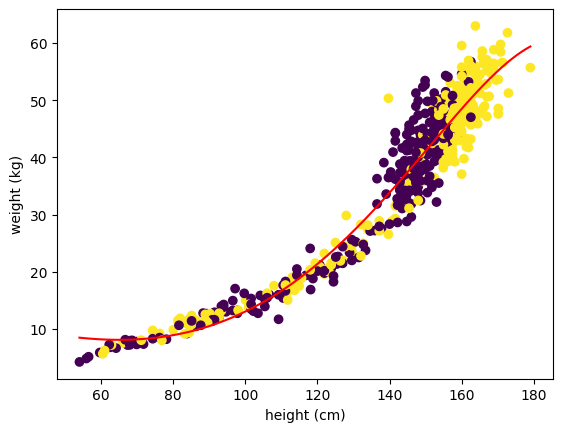

In [48]:
import matplotlib.pyplot as plt
height = howell_full_df['height']
weight = howell_full_df['weight']
# Gender wise plotting
gender = howell_full_df['male']
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = reg_lr_model.predict(inputs_poly)
plt.plot(x_values, y_values, c='red')
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()